Import necessary packages

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading dataset

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0].shape


(28, 28)

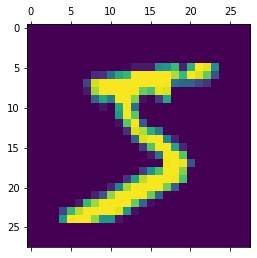

In [7]:
plt.matshow(X_train[0])


In [8]:
y_train[0]


5

Scaling the train and test dataset

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

Creating and Training a Convolutional Neural Network

In [12]:
model = keras.Sequential([
    
    layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (4,4), input_shape=(28, 28, 1)),
    
 
    layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
optimizer = tf.keras.optimizers.SGD(0.01)
optimizer.learning_rate.assign(0.001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.001>

In [24]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,batch_size=40, epochs=12)

Epoch 1/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0326 - accuracy: 0.9896
Epoch 2/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0307 - accuracy: 0.9905
Epoch 3/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 4/12
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0267 - accuracy: 0.9919
Epoch 5/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 6/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 7/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 8/12
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0212 - accuracy: 0.9938
Epoch 9/12
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 10/12
1500/1500 [==============================] - 55s 37m

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Evaluating the CNN model

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0326 - accuracy: 0.9889


[0.032596200704574585, 0.9889000058174133]

In [27]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 3s 9ms/step


array([5.6590403e-09, 1.3247114e-07, 2.5427076e-05, 4.9570344e-06,
       3.6202918e-10, 7.4846520e-09, 1.0201739e-12, 9.9996728e-01,
       4.7291550e-08, 2.1524481e-06], dtype=float32)

 np.argmax finds a maximum element from an array and returns the index of it

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    2,    0,    0,    0,    0,    2,    2,    0],
       [   0, 1129,    1,    0,    0,    1,    1,    1,    1,    1],
       [   2,    0, 1028,    0,    0,    0,    0,    1,    1,    0],
       [   1,    0,    4,  994,    0,    6,    0,    0,    4,    1],
       [   0,    0,    2,    0,  968,    0,    1,    1,    0,   10],
       [   2,    0,    0,    4,    0,  882,    1,    0,    3,    0],
       [   3,    2,    0,    1,    2,    5,  944,    0,    1,    0],
       [   1,    2,   11,    1,    0,    0,    0, 1006,    3,    4],
       [   3,    0,    1,    0,    0,    1,    1,    0,  966,    2],
       [   1,    2,    0,    0,    2,    3,    0,    2,    1,  998]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

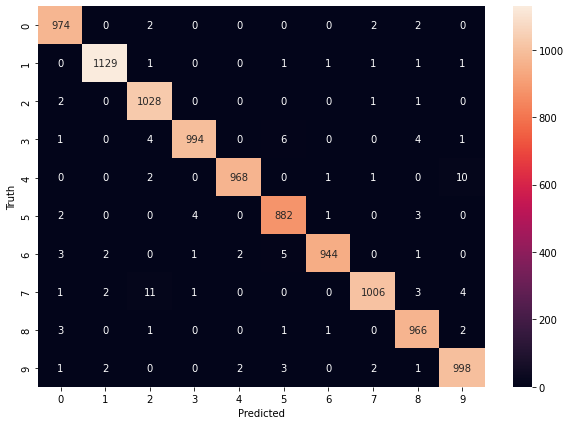

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')